# Create Latitude and Longitude Combinations


In [1]:
# Module 6.1.4
# By Emmanuel Martinez

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Found an error on Module 6.1.5 telling me the following: "API_practice file"

In [5]:
# Let's import the citipy script and practice using it. 
# In our "API_practice file", add a new cell and import the citipy.py script from the citipy module.

# But works on WeatherPy file, not over "API_practice file".

# Use the citipy module to determine city based on latitude and longitude.
# from citipy import citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vao nc
puerto maldonado pe
lillesand no
kontagora ng
vaini to
sandwick gb
marcona pe
kaitangata nz
sirjan ir
hithadhoo mv
barrow us
arraial do cabo br
hwange zw
saint-joseph re
butaritari ki
kapaa us
urtaaul uz
kruisfontein za
gurgan az
albany au
sentyabrskiy ru
new norfolk au
port alfred za
bambous virieux mu
miranda de ebro es
jiuquan cn
chapais ca
butaritari ki
charters towers au
bluff nz
kodiak us
geraldton au
dikson ru
vaini to
touros br
almora in
barentsburg sj
pandan niog ph
busselton au
chuy uy
cankuzo bi
kamenka ru
clyde river ca
castro cl
pisco pe
guerrero negro mx
kieta pg
bluff nz
saskylakh ru
ushtobe kz
chuy uy
reconquista ar
gornji vakuf ba
saskylakh ru
provideniya ru
grindsted dk
hobart au
castro cl
jamestown sh
ushuaia ar
rancho palos verdes us
santa luzia br
clyde river ca
albany au
yellowknife ca
chipinge zw
ayolas py
rikitea pf
oranjemund na
port alfred za
alice springs au
cape town za
butaritari ki
kayes ml
dikson ru
georgetown sh
punta arenas cl
rikitea pf
deputats

nikolskoye ru
mataura pf
qaanaaq gl
rikitea pf
vaini to
bredasdorp za
saint-philippe re
benghazi ly
clyde river ca
dingle ie
codrington ag
dhidhdhoo mv
illoqqortoormiut gl
punta arenas cl
punta arenas cl
kamiiso jp
ushuaia ar
padang id
ilulissat gl
san quintin mx
chokurdakh ru
hay river ca
punta arenas cl
constitucion cl
clovis us
satitoa ws
butaritari ki
dikson ru
hobart au
klaksvik fo
mount pleasant us
bluff nz
vanimo pg
thompson ca
lorengau pg
san quintin mx
banjar id
vaitupu wf
ponta do sol cv
maragogi br
kodiak us
tuktoyaktuk ca
provideniya ru
upernavik gl
lavrentiya ru
puerto ayora ec
barentsburg sj
kapaa us
busselton au
hihifo to
bredasdorp za
mar del plata ar
hobart au
jamestown sh
avarua ck
price us
axim gh
waingapu id
katsuura jp
moroni km
xuanzhou cn
hilo us
nuuk gl
kapaa us
thompson ca
rikitea pf
svetlyy ru
kungurtug ru
cidreira br
chokurdakh ru
albany au
hobart au
penzance gb
babynino ru
vanavara ru
hilo us
padang id
rikitea pf
hobart au
rikitea pf
touros br
qaanaaq gl
vie

taolanaro mg
ilulissat gl
taburao ki
vila velha br
clarence town bs
alta floresta br
mahebourg mu
ushuaia ar
bluff nz
tiksi ru
chengde cn
mar del plata ar
kapustin yar ru
atuona pf
new norfolk au
mitsamiouli km
selyatino ru
acapulco mx
bredasdorp za
grand-lahou ci
haines junction ca
toora-khem ru
ushibuka jp
port elizabeth za
bandundu cd
pemangkat id
fortuna us
belushya guba ru
acapulco mx
moncarapacho pt
ushuaia ar
hailar cn
nome us
butaritari ki
kapaa us
taolanaro mg
sapa ph
kodiak us
ushuaia ar
cabo san lucas mx
freeport us
marsa matruh eg
albany au
vaini to
attawapiskat ca


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [9]:
import requests
requests.__version__

'2.24.0'

# Get the City Weather Data

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vao
Processing Record 2 of Set 1 | puerto maldonado
Processing Record 3 of Set 1 | lillesand
Processing Record 4 of Set 1 | kontagora
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | sandwick
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | sirjan
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | hwange
Processing Record 14 of Set 1 | saint-joseph
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | urtaaul
City not found. Skipping...
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | gurgan
City not found. Skipping...
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | sentya

Processing Record 39 of Set 4 | boyolangu
Processing Record 40 of Set 4 | dutse
Processing Record 41 of Set 4 | omboue
Processing Record 42 of Set 4 | dubenskiy
City not found. Skipping...
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | altay
Processing Record 45 of Set 4 | severnoye
Processing Record 46 of Set 4 | xapuri
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | ishinomaki
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | arroyo
Processing Record 1 of Set 5 | batagay-alyta
Processing Record 2 of Set 5 | ibotirama
Processing Record 3 of Set 5 | arcata
Processing Record 4 of Set 5 | galle
Processing Record 5 of Set 5 | aracruz
Processing Record 6 of Set 5 | antalaha
Processing Record 7 of Set 5 | ereymentau
Processing Record 8 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 5 | nemuro
Processing Record 10 of Set 5 | cap malheureux
Processing Record 11 of Set 5 | sioux look

Processing Record 29 of Set 8 | marshfield
Processing Record 30 of Set 8 | satka
Processing Record 31 of Set 8 | paytug
City not found. Skipping...
Processing Record 32 of Set 8 | kendal
Processing Record 33 of Set 8 | aksay
Processing Record 34 of Set 8 | henties bay
Processing Record 35 of Set 8 | fairbanks
Processing Record 36 of Set 8 | san andres
Processing Record 37 of Set 8 | port-gentil
Processing Record 38 of Set 8 | gat
Processing Record 39 of Set 8 | banjar
Processing Record 40 of Set 8 | damietta
Processing Record 41 of Set 8 | masallatah
Processing Record 42 of Set 8 | marzuq
Processing Record 43 of Set 8 | manuk mangkaw
Processing Record 44 of Set 8 | billings
Processing Record 45 of Set 8 | kazerun
Processing Record 46 of Set 8 | hanmer springs
Processing Record 47 of Set 8 | aalestrup
City not found. Skipping...
Processing Record 48 of Set 8 | fortuna
Processing Record 49 of Set 8 | sinop
Processing Record 50 of Set 8 | omsukchan
Processing Record 1 of Set 9 | keningau


Processing Record 18 of Set 12 | tucuma
Processing Record 19 of Set 12 | san joaquin
Processing Record 20 of Set 12 | oistins
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | walvis bay
Processing Record 23 of Set 12 | bria
Processing Record 24 of Set 12 | ust-kulom
Processing Record 25 of Set 12 | qobustan
Processing Record 26 of Set 12 | yian
City not found. Skipping...
Processing Record 27 of Set 12 | nantucket
Processing Record 28 of Set 12 | tomohon
Processing Record 29 of Set 12 | roebourne
Processing Record 30 of Set 12 | beidao
Processing Record 31 of Set 12 | plouzane
Processing Record 32 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 33 of Set 12 | palembang
Processing Record 34 of Set 12 | ixtapa
Processing Record 35 of Set 12 | zharkent
Processing Record 36 of Set 12 | ambovombe
Processing Record 37 of Set 12 | hoa binh
Processing Record 38 of Set 12 | saint simons
Processing Record 39 of Set 12 | arman
Processing Record 40 of S

In [13]:
len(city_data)

587

# Create a DataFrame of City Weather Data

In [14]:
# Module 6.2.7

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.67,167.48,73.06,79,0,15.52,NC,2020-10-29 06:52:40
1,Puerto Maldonado,-12.60,-69.18,75.36,93,100,1.81,PE,2020-10-29 06:52:40
2,Lillesand,58.25,8.38,37.40,93,90,4.70,NO,2020-10-29 06:52:40
3,Kontagora,10.40,5.47,75.15,41,0,4.05,NG,2020-10-29 06:52:40
4,Vaini,-21.20,-175.20,71.60,73,75,9.17,TO,2020-10-29 06:52:40
5,Sandwick,60.00,-1.25,48.20,87,0,11.41,GB,2020-10-29 06:52:40
6,Kaitangata,-46.28,169.85,53.01,89,15,17.00,NZ,2020-10-29 06:52:40
7,Sirjan,29.45,55.68,68.31,20,0,7.36,IR,2020-10-29 06:49:14
8,Hithadhoo,-0.60,73.08,83.50,74,1,11.72,MV,2020-10-29 06:52:40
9,Barrow,71.29,-156.79,15.80,85,90,11.41,US,2020-10-29 06:50:02


In [16]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vao,NC,2020-10-29 06:52:40,-22.67,167.48,73.06,79,0,15.52
1,Puerto Maldonado,PE,2020-10-29 06:52:40,-12.60,-69.18,75.36,93,100,1.81
2,Lillesand,NO,2020-10-29 06:52:40,58.25,8.38,37.40,93,90,4.70
3,Kontagora,NG,2020-10-29 06:52:40,10.40,5.47,75.15,41,0,4.05
4,Vaini,TO,2020-10-29 06:52:40,-21.20,-175.20,71.60,73,75,9.17
...,...,...,...,...,...,...,...,...,...
582,Moncarapacho,PT,2020-10-29 06:53:02,37.09,-7.79,62.60,88,0,9.17
583,Hailar,CN,2020-10-29 06:53:02,49.20,119.70,35.62,82,0,8.63
584,Sapa,PH,2020-10-29 06:53:02,5.15,120.32,84.79,72,0,5.06
585,Freeport,US,2020-10-29 06:49:02,40.66,-73.58,57.00,87,90,5.17


# Create an output file to save the DataFrame as a CSV in a new folder for that file.

In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603954381.8439386

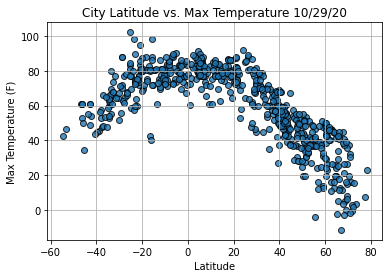

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# Plot Latitude vs. Humidity

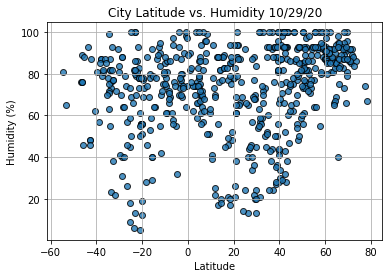

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot Latitude vs. Cloudiness

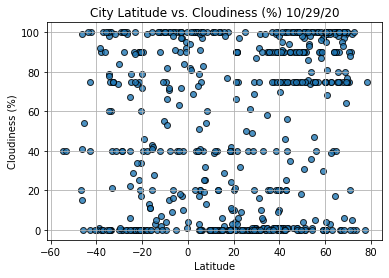

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Plot Latitude vs. Wind Speed

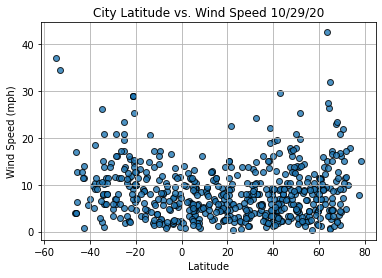

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Find the Correlation Between Latitude and Maximum Temperature

In [26]:
# Module 6.4.2

In [37]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [38]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [39]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2020-10-29 06:52:40
Lat                          3.07
Lng                        172.79
Max Temp                    81.77
Humidity                       74
Cloudiness                    100
Wind Speed                   6.42
Name: 13, dtype: object

In [40]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
582     True
583     True
584     True
585     True
586     True
Name: Lat, Length: 587, dtype: bool

In [41]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Lillesand,NO,2020-10-29 06:52:40,58.25,8.38,37.40,93,90,4.70
3,Kontagora,NG,2020-10-29 06:52:40,10.40,5.47,75.15,41,0,4.05
5,Sandwick,GB,2020-10-29 06:52:40,60.00,-1.25,48.20,87,0,11.41
7,Sirjan,IR,2020-10-29 06:49:14,29.45,55.68,68.31,20,0,7.36
9,Barrow,US,2020-10-29 06:50:02,71.29,-156.79,15.80,85,90,11.41


In [42]:
 # Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

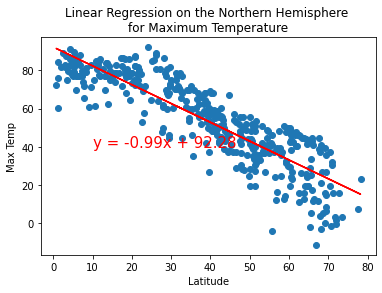

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

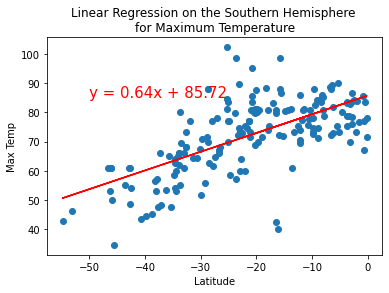

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

# Find the Correlation Between Latitude and Percent Humidity

In [47]:
# Module 6.4.3

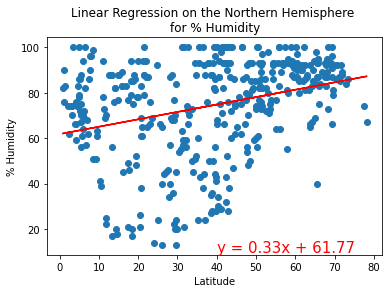

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

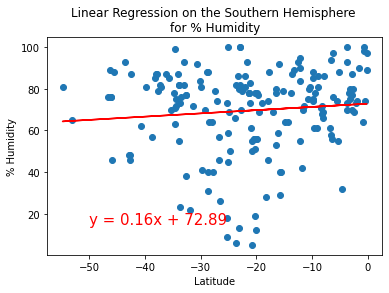

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

# Find the Correlation Between Latitude and Percent Cloudiness

In [52]:
# Module 6.4.4

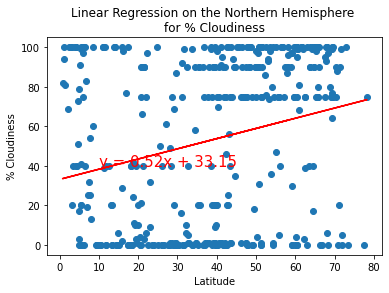

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

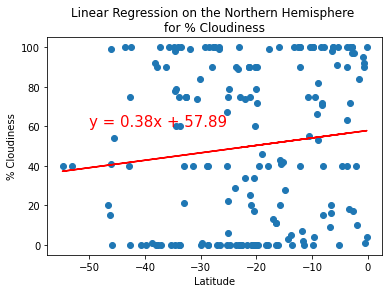

In [55]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

# Find the Correlation Between Latitude and Wind Speed

In [57]:
# Module 6.4.5

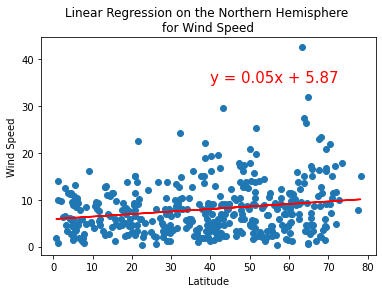

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

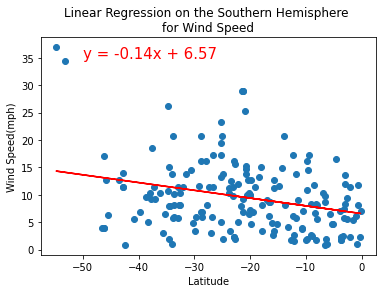

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))